In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras.backend as K
from keras.utils.np_utils import to_categorical
# Train-Test
from sklearn.model_selection import train_test_split
# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import classification_report

In [20]:
df = pd.read_csv('rice.csv')

In [21]:
# Remove Missing Values
na = pd.notnull(df["Status"])
df = df[na]

In [22]:
df = df[["Status", "Soil_Moisture", "Temperature", "Humidity", "Time"]]


In [23]:
from sklearn.preprocessing import StandardScaler
x = df.drop("Status", axis=1)
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))
y = df["Status"]

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x.values, y, test_size=0.2)

In [25]:
# model = Sequential()
# model.add(Dense(32, input_shape=(4,), activation="relu"))
# model.add(Dense(32, activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation="softmax"))
# model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

inputs = tf.keras.Input(shape=(4,))
x = Dense(32, activation="relu")(inputs)
x = Dense(32, activation="relu")(inputs)
x = Dropout(0.5)(x)
outputs = Dense(1, activation="relu")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])


In [26]:
model.summary()
model.fit(x_train, y_train, epochs=30, batch_size=100)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_4 (Dense)             (None, 32)                160       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
800/800 [==============================] - 3s 3ms/step - loss: 2.7493 - accuracy: 0.5220
Epoch 2/30
800/800 [==============================] - 2s 3ms/step - loss: 1.5181 - accuracy: 

In [33]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_new = [int(i > .5) for i in y_pred]
print("Hasil Klasifikasi: \n", classification_report(
    y_test, y_pred_new, zero_division=1))
confusion_matrix(y_test, y_pred_new)

Hasil Klasifikasi: 
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      9343
           1       0.82      0.91      0.86     10657

    accuracy                           0.84     20000
   macro avg       0.85      0.84      0.84     20000
weighted avg       0.85      0.84      0.84     20000



array([[7160, 2183],
       [ 971, 9686]], dtype=int64)

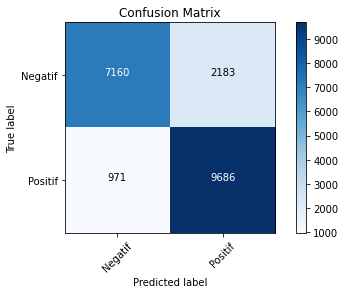

In [35]:
cm = confusion_matrix(y_test, y_pred_new)
cm_plot_labels = ['Negatif', 'Positif']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [36]:
#model.save('model.h5')
